In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.cluster import KMeans

(240, 180, 3)


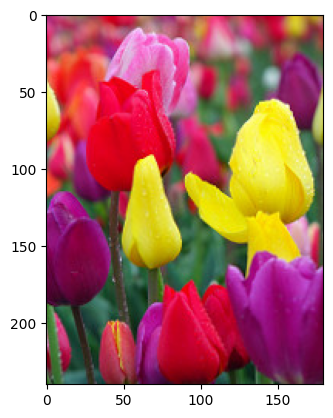

In [2]:
# Read image as an array
img = plt.imread(r"datasets/tulip.jpg")

# The image is 240px high, 180px wide, and has 3 channels (RGB)
print(img.shape)

# Plot the image using the plt.imshow function
plt.imshow(img)

In [3]:
# Reshape the array so each row represents a pixel
img_flat = img.reshape(img.shape[0] * img.shape[1], 3)

# We have an array of 43,200 rows and 3 columns
img_flat.shape

(43200, 3)

In [4]:
# First five pixels in the array
img_flat[:5, :]

array([[182,  36, 109],
       [181,  42, 110],
       [180,  50, 114],
       [181,  57, 117],
       [182,  63, 119]], dtype=uint8)

In [5]:
# Create a pandas df, where each column represent the value of the color
df = pd.DataFrame(img_flat, columns=["r", "g", "b"])
df

r   g    b
0      182  36  109
1      181  42  110
2      180  50  114
3      181  57  117
4      182  63  119
...    ...  ..  ...
43195   84  39   70
43196   77  41   67
43197   74  39   63
43198   70  38   59
43199   71  42   60

[43200 rows x 3 columns]

In [6]:
# Create 3D plot where each pixel in
def plot_pixels_3d(df):
    color = [
        f"rgb({r},{g},{b})" for r, g, b in zip(df.r.values, df.g.values, df.b.values)
    ]

    trace = go.Scatter3d(
        x=df.r,
        y=df.g,
        z=df.b,
        mode="markers",
        marker=dict(size=1, color=color, opacity=0.5),
    )

    data = [trace]
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(scene=dict(xaxis_title="R", yaxis_title="G", zaxis_title="B"))
    return fig


fig = plot_pixels_3d(df)
fig.show()

In [7]:
# Instantite a K-Means Model with 1 Cluster
kmeans = KMeans(n_clusters=1, random_state=42, n_init="auto").fit(img_flat)

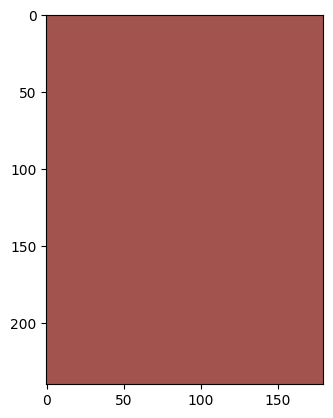

In [8]:
img_flat_1 = img_flat.copy()

# Replace each row in the original image with its closest cluster center
for i in np.unique(kmeans.labels_):
    img_flat_1[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

# Reshape the image back to its original shape
img1 = img_flat_1.reshape(img.shape)

# There's only 1 cluster, the mean of all values in each columns
plt.imshow(img1)

In [9]:
# Cluster center location (there is only one)
print(kmeans.cluster_centers_)

# Mean of the dataframe
print(df.mean().values)

[[162.57351852  83.61993056  78.14574074]]
[162.57351852  83.61993056  78.14574074]


In [10]:
# Read the bytes into plt.imread()
from io import BytesIO


# Helper function to visualize the clusters
def plot_clusters(df):
    # Use the colors of the compressed df
    color = [
        f"rgb({r},{g},{b})" for r, g, b in zip(df.r.values, df.g.values, df.b.values)
    ]

    # Use the points of the original df
    df_original = pd.DataFrame(img_flat, columns=["r", "g", "b"])

    trace = go.Scatter3d(
        x=df_original.r,
        y=df_original.g,
        z=df_original.b,
        mode="markers",
        marker=dict(size=1, color=color, opacity=0.5),
    )

    data = [trace]
    layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
    fig = go.Figure(data=data, layout=layout)

    fig.update_layout(scene=dict(xaxis_title="R", yaxis_title="G", zaxis_title="B"))
    return fig

Training a KMeans Model with 1 clusters


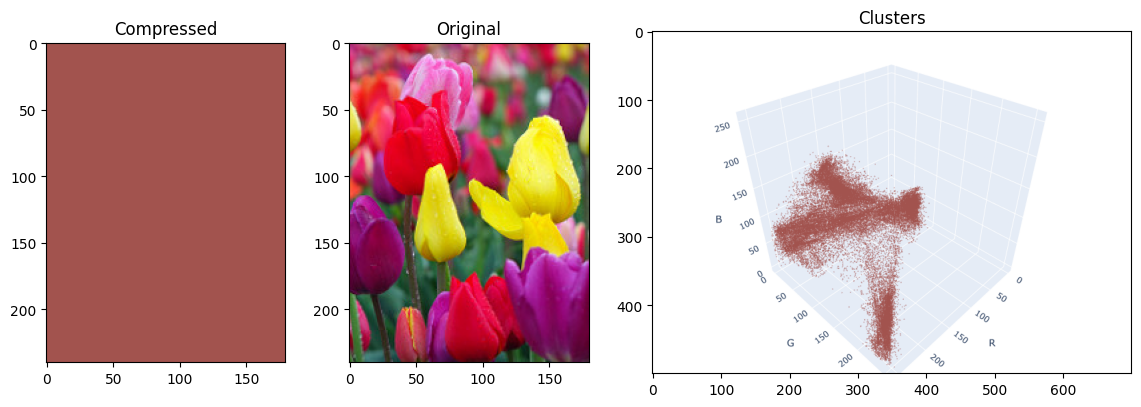


Training a KMeans Model with 2 clusters


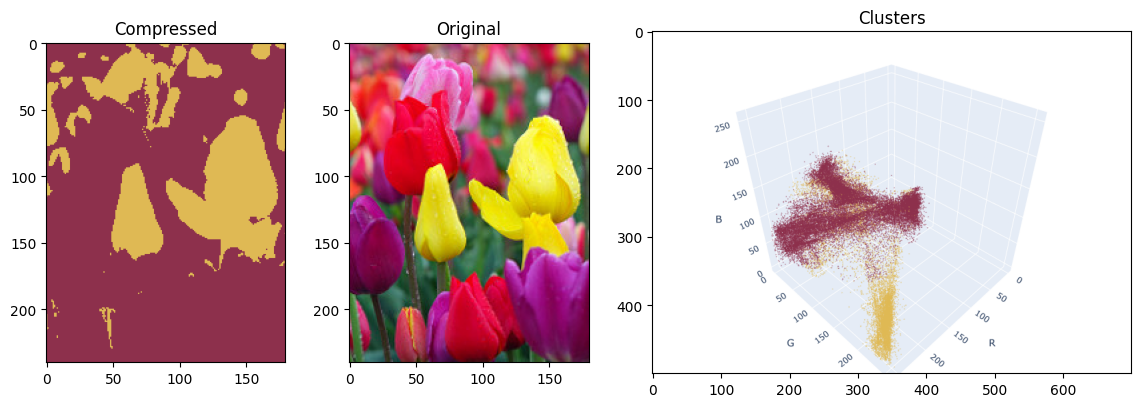


Training a KMeans Model with 3 clusters


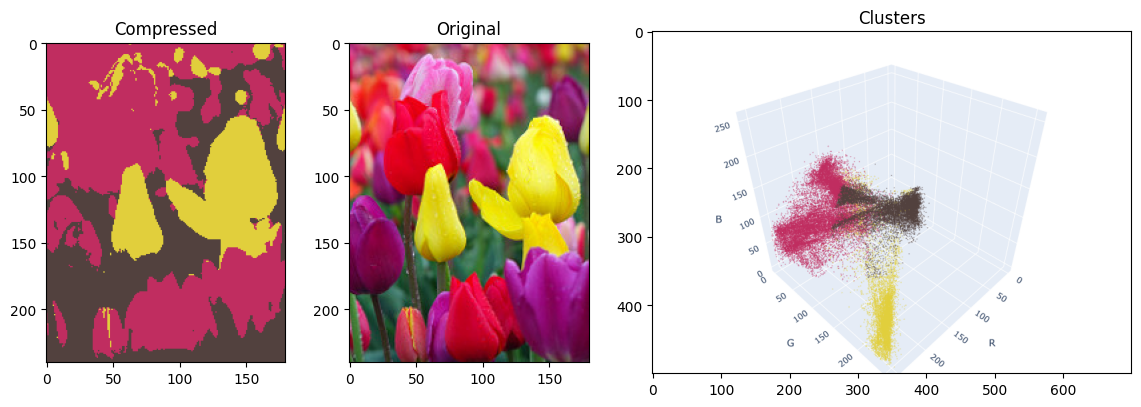


Training a KMeans Model with 5 clusters


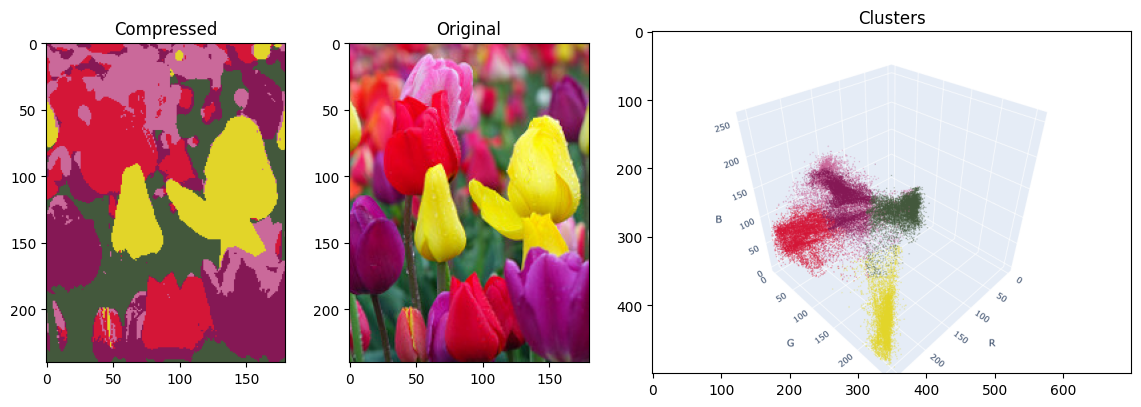


Training a KMeans Model with 10 clusters


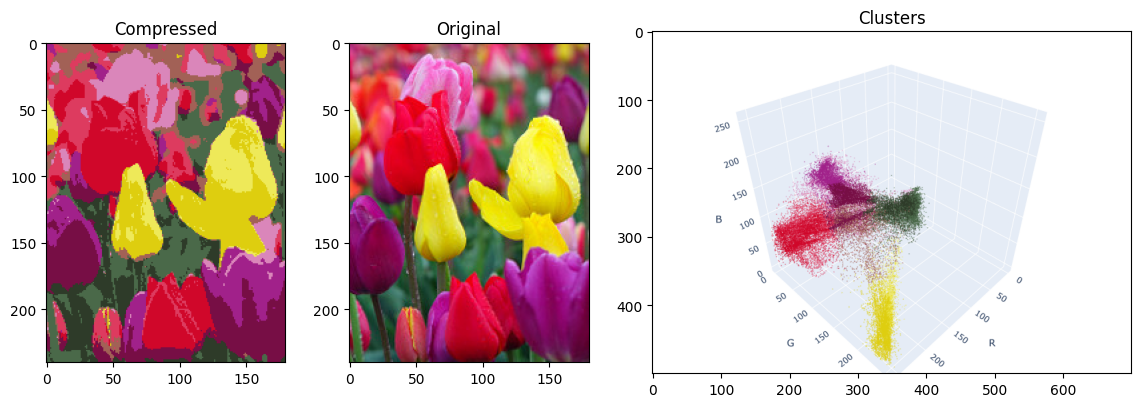


Training a KMeans Model with 20 clusters


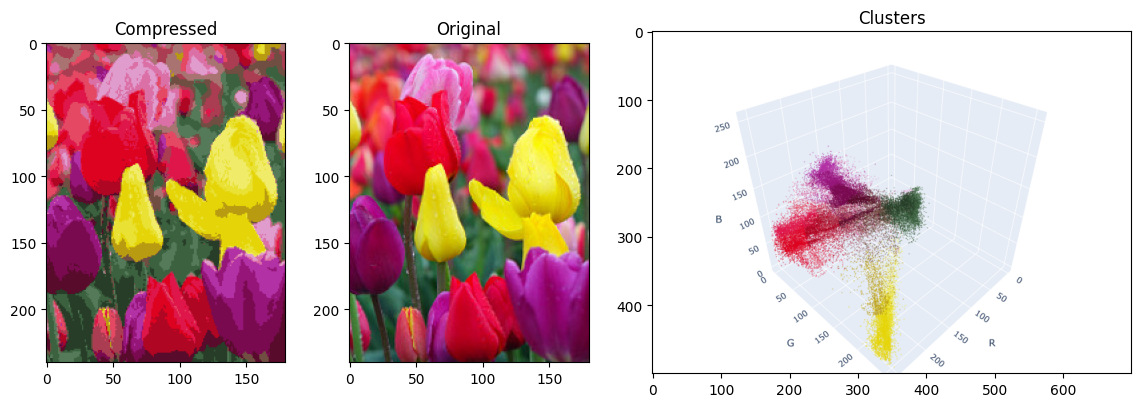


Training a KMeans Model with 30 clusters


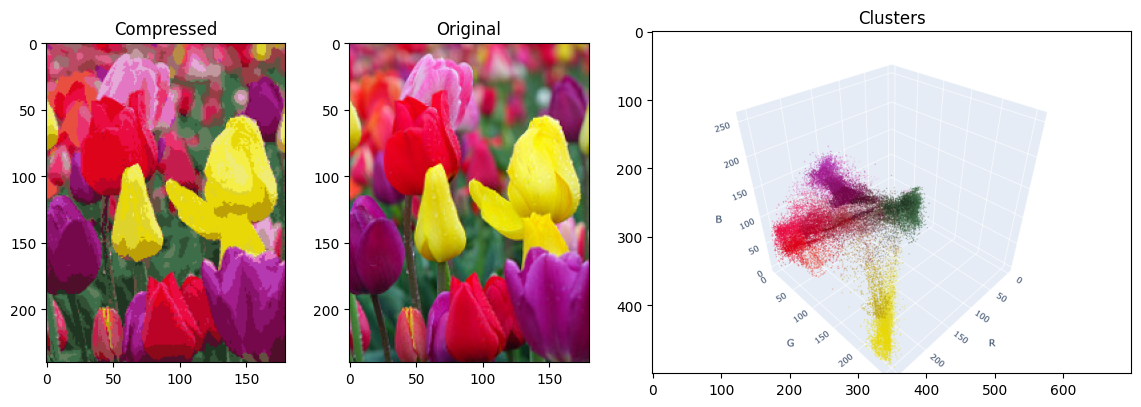


Training a KMeans Model with 50 clusters


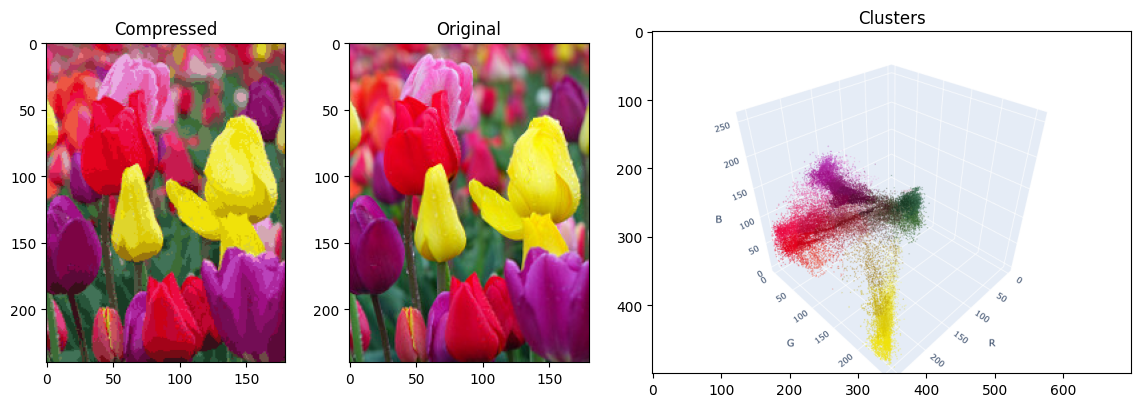


Training a KMeans Model with 100 clusters


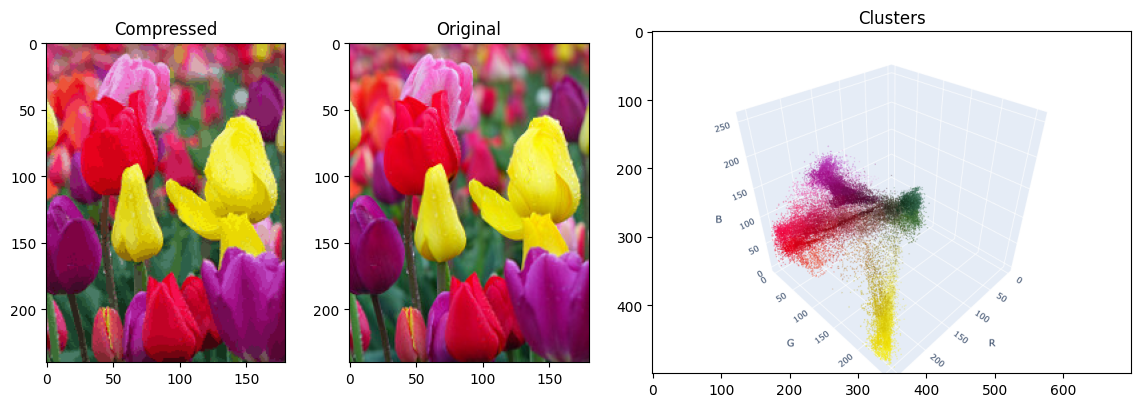


Training a KMeans Model with 200 clusters


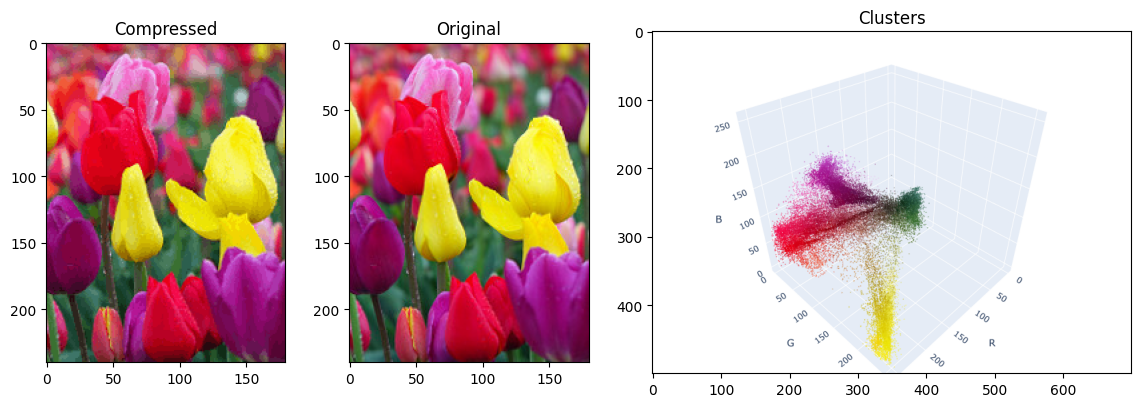


Training a KMeans Model with 300 clusters


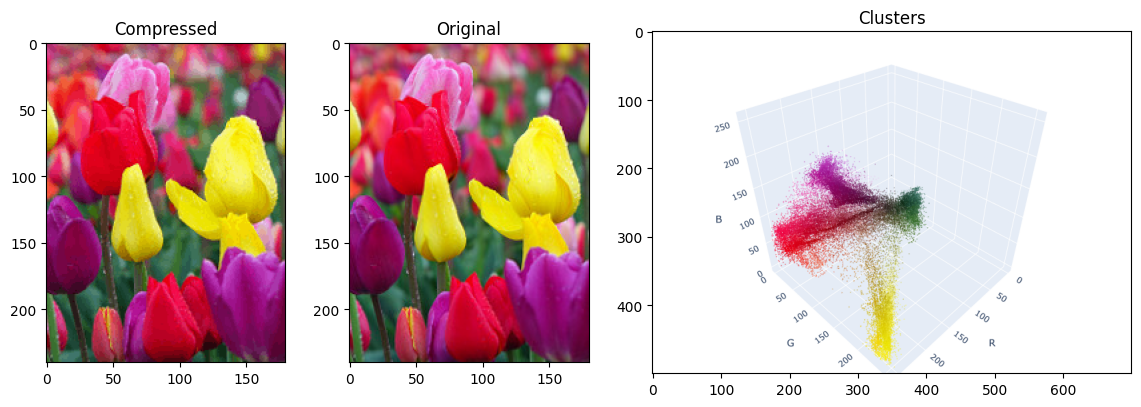


Training a KMeans Model with 500 clusters


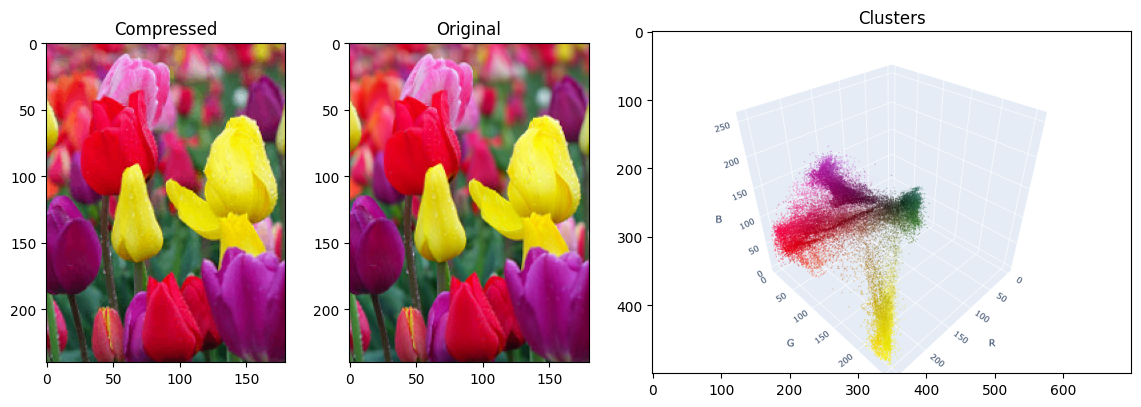


Training a KMeans Model with 1000 clusters


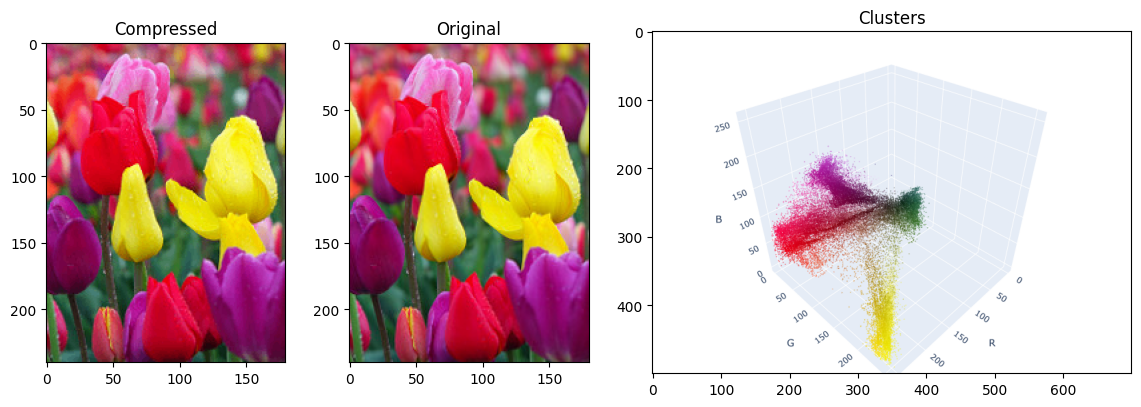

In [29]:
# Let's try different n_cluster numbers


def compress_image_kmeans(n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init="auto").fit(img_flat)

    # Make a copy of the image to modify it
    img_flat_1 = img_flat.copy()

    # Replace each row in the original image with its closest cluster center
    for i in np.unique(kmeans.labels_):
        img_flat_1[kmeans.labels_ == i, :] = kmeans.cluster_centers_[i]

    # Reshape the image back to its original shape
    img1 = img_flat_1.reshape(img.shape)

    # Plot the clusters
    df = pd.DataFrame(img_flat_1, columns=["r", "g", "b"])
    cluster_fig = plot_clusters(df)

    return img1, cluster_fig


for n in [1, 2, 3, 5, 10, 20, 30, 50, 100, 200, 300, 500, 1000]:
    print(f"Training a KMeans Model with {n} clusters")
    img_compressed, cluster_fig = compress_image_kmeans(n_clusters=n)

    fig, ax = plt.subplots(
        1, 3, figsize=(14, 6), gridspec_kw={"width_ratios": [1, 1, 2]}
    )
    ax[0].set_title("Compressed")
    ax[0].imshow(img_compressed)
    ax[1].set_title("Original")
    ax[1].imshow(img)
    ax[2].set_title("Clusters")
    ax[2].imshow(plt.imread(BytesIO(cluster_fig.to_image("png"))))
    plt.show()
    print()